In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.stats.tests.test_influence
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

## __1 - Business Problem__  
___Consider only the below columns and prepare a prediction model for predicting Price___  
___Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]___

## __2 - Data collection and description__ 

In [2]:
df = pd.read_csv("../Raw Data//ToyotaCorolla.csv",encoding='latin1')

In [3]:
df1 = df [['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [4]:
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [5]:
df1.describe

<bound method NDFrame.describe of       Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]>

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

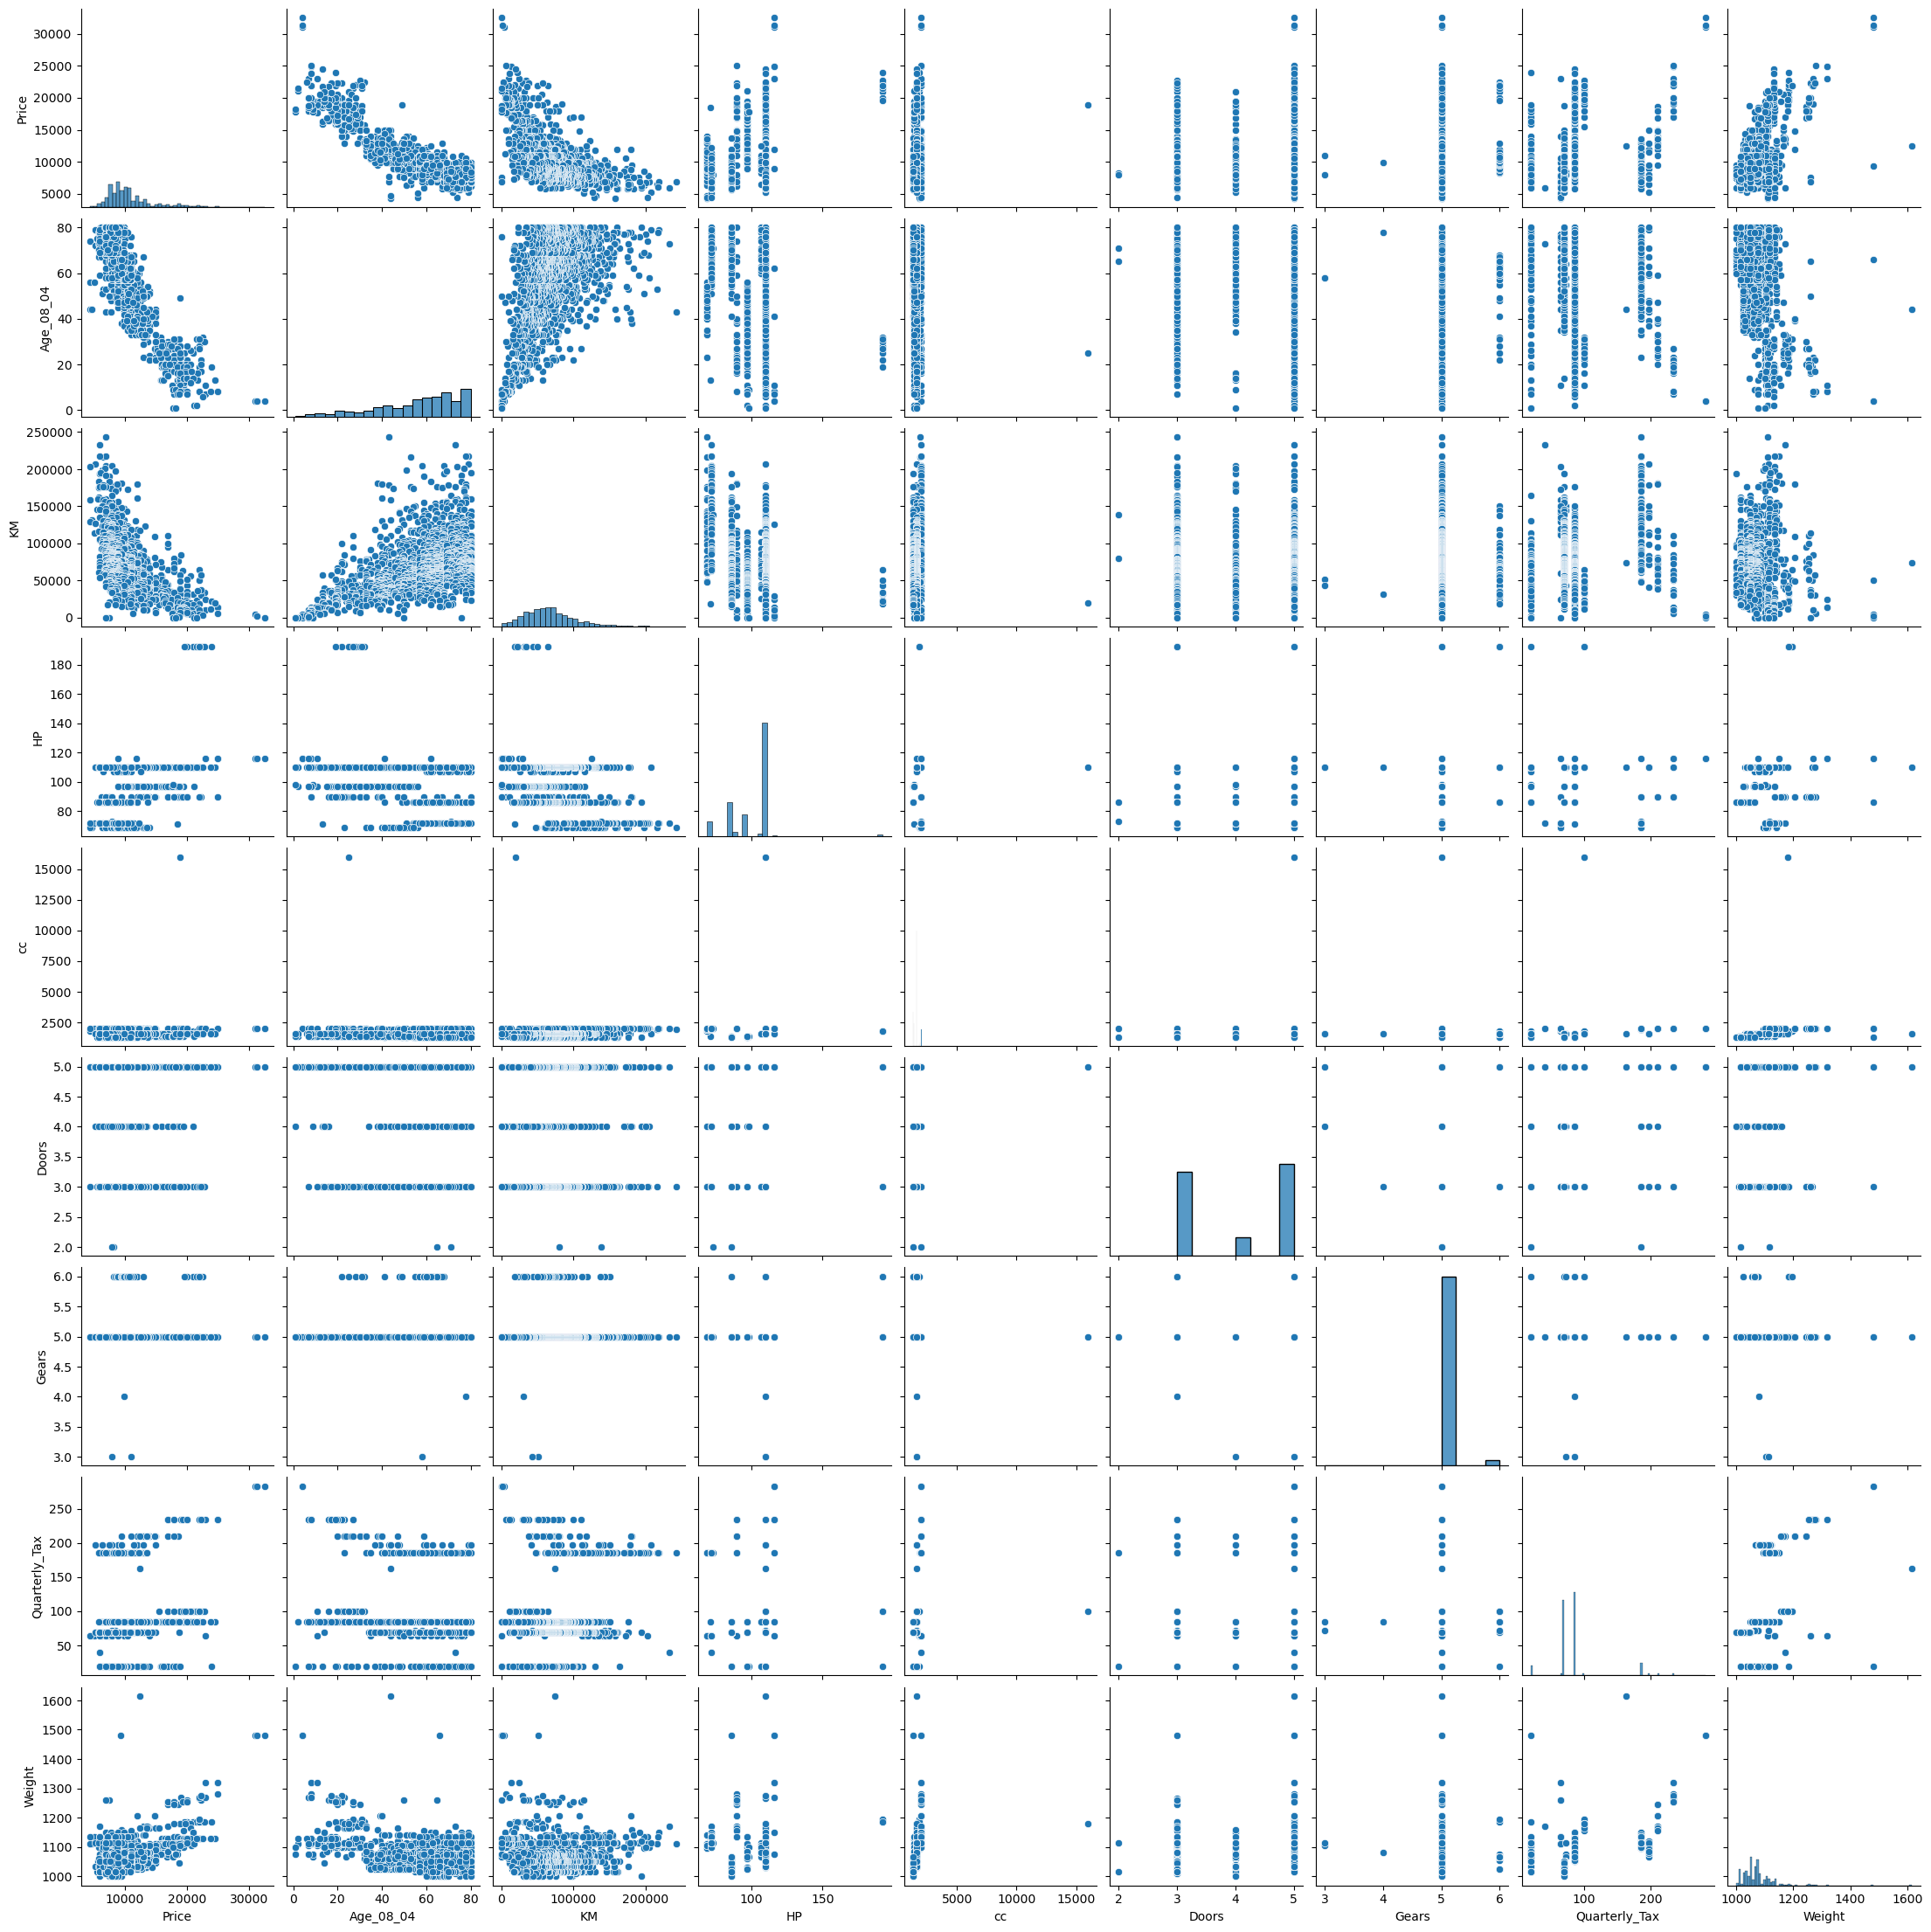

In [6]:
sns.pairplot(df1)

## __3 - Correlation Matrix__ 

In [9]:
df1.head()

corrMatrix = df1.corr()

<Axes: >

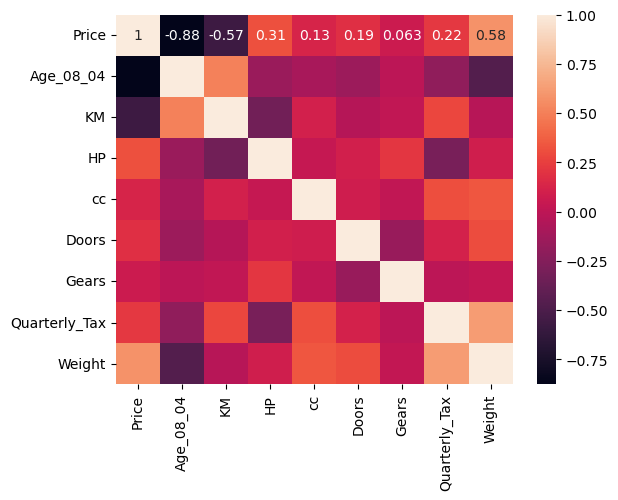

In [10]:
sns.heatmap(corrMatrix, annot=True)

## __4 - Regression Model__ 

In [11]:
X = df1[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
Y = df1[['Price']]

In [12]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.247e+04
Date:                Sat, 18 May 2024   Prob (F-statistic):                        0.00
Time:                        15:36:38   Log-Likelihood:                         -12383.
No. Observations:                1436   AIC:                                  2.478e+04
Df Residuals:                    1428   BIC:                                  2.482e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -125.4510      2.445    -51.303      0.000    -130.248    -120.654
KM               -0.0205      0.001    -16.305      0.000      -0.023      -0.018
HP               33.4737      2.796     11.973      0.000      27.990      38.958
cc               -0.1032      0.090     -1.141      0.254      -0.281       0.074
Doors            -7.2494     40.184     -0.180      0.857     -86.075      71.576
Gears            78.3780    148.258      0.529      0.597    -212.449     369.205
Quarterly_Tax     5.8258      1.227      4.748      0.000       3.419       8.233
Weight           14.0322      0.773     18.157      0.000      12.516      15.548
==============================================================================
Omnibus:                      108.641   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              562.996
Skew:                           0.019   Prob(JB):                    5.59e-123
Kurtosis:                       6.067   Cond. No.                     3.26e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### R sq and p Value of the Model is Good and the model can be accepted. However as you can see not all variables have acceptable p value. Thus we have Multicollinearity issue in our Data Frame

## __4 - Solving Multicollinearity__ 

### __4.1 - Finding Cook's Distance__ 

In [14]:
infl = model.get_influence()

In [15]:
summ_df = infl.summary_frame()

In [16]:
summ_df.sort_values('cooks_d', ascending=False)

,dfb_Age_08_04,dfb_KM,dfb_HP,dfb_cc,dfb_Doors,dfb_Gears,dfb_Quarterly_Tax,dfb_Weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
80,-0.289686,-2.363023e+00,-2.781734,2.615263e+01,0.645518,0.905398,-4.283020,-3.611394,8.241996e+01,7.678996,0.917911,25.678000,7.839881,26.215988
221,-0.255051,-2.607849e-02,0.174427,4.179288e-01,0.553762,1.572311,0.558929,-1.690024,3.719885e-01,-6.154172,0.072850,-1.725082,-6.235259,-1.747812
960,-0.208597,3.740370e-02,0.443719,1.977218e-01,0.539659,0.995730,0.788653,-1.264022,2.083232e-01,-4.104460,0.090022,-1.290963,-4.127441,-1.298191
109,0.104572,-2.934313e-01,0.114571,-1.902240e-01,-0.220145,-0.606577,0.332191,0.558699,1.226360e-01,4.952891,0.038456,0.990499,4.994239,0.998768
601,-0.213100,3.186680e-01,0.385097,-1.107466e-01,0.404397,0.551158,0.429648,-0.747923,9.677099e-02,-5.594639,0.024137,-0.879868,-5.654999,-0.889361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,-0.000069,-5.512316e-05,0.000142,6.568459e-05,0.000134,-0.000053,0.000083,-0.000039,1.558972e-08,-0.006835,0.002662,-0.000353,-0.006833,-0.000353
482,-0.000005,2.712104e-08,-0.000085,2.916557e-07,-0.000162,0.000013,-0.000026,0.000046,8.250836e-09,-0.006371,0.001623,-0.000257,-0.006369,-0.000257
1433,-0.000136,1.856487e-04,0.000104,1.209905e-05,0.000052,-0.000037,-0.000025,-0.000011,7.008564e-09,-0.002953,0.006388,-0.000237,-0.002952,-0.000237
397,-0.000015,4.001993e-05,0.000028,1.344847e-06,-0.000098,-0.000034,0.000125,0.000025,6.628524e-09,0.002440,0.008830,0.000230,0.002439,0.000230


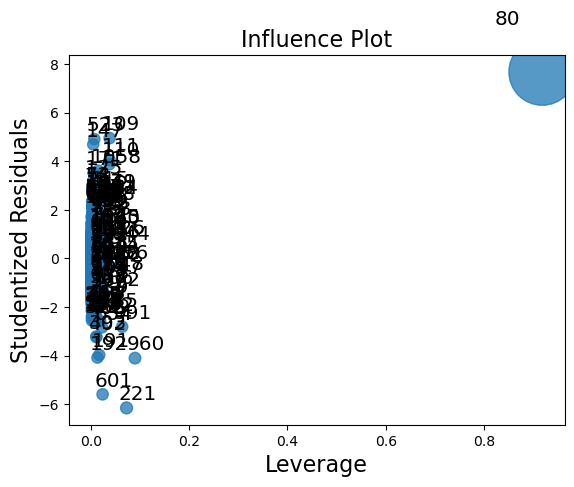

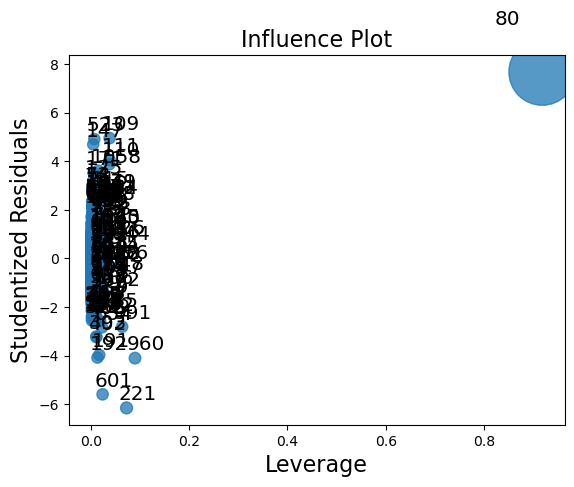

In [17]:
infl.plot_influence()

#### Index 80 has highest Cook's Distance  
Thus it will be wise to drop this row from the data set

### __4.2 - Finding Variance Inflation Factor (VIF)__ 

In [18]:
vif = pd.DataFrame()

In [19]:
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [20]:
vif["features"] = X.columns

In [21]:
vif.round(1)

,VIF Factor,features
0,16.4,Age_08_04
1,7.6,KM
2,64.9,HP
3,17.2,cc
4,21.9,Doors
5,438.6,Gears
6,11.0,Quarterly_Tax
7,543.1,Weight


#### As expected, Geras and Weight have a high variance inflation factor because they "explain" the same variance within this dataset. We would need to discard one of these variables to improve model and try to solve multicolinearity.

In [22]:
# Removed Weight fron the dataframe and Tested the model
new_X = df1[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax']]

In [23]:
new_model = sm.OLS(Y, new_X).fit()
new_predictions = new_model.predict(new_X)

In [24]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.155e+04
Date:                Sat, 18 May 2024   Prob (F-statistic):                        0.00
Time:                        15:37:00   Log-Likelihood:                         -12532.
No. Observations:                1436   AIC:                                  2.508e+04
Df Residuals:                    1429   BIC:                                  2.512e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -132.0628      2.682    -49.245      0.000    -137.323    -126.802
KM               -0.0208      0.001    -14.947      0.000      -0.024      -0.018
HP               44.4711      3.027     14.692      0.000      38.533      50.409
cc                0.1805      0.099      1.827      0.068      -0.013       0.374
Doors           272.5298     41.159      6.621      0.000     191.791     353.269
Gears          2417.9083     81.331     29.729      0.000    2258.368    2577.449
Quarterly_Tax    17.0169      1.177     14.462      0.000      14.709      19.325
==============================================================================
Omnibus:                      184.883   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              583.580
Skew:                           0.640   Prob(JB):                    1.89e-127
Kurtosis:                       5.849   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### As you can see, once we remove "Weight" from input variables and run the model again, all the variables are significant.

## __5 - Final Model__ 

In [25]:
# Removed Index with highest Cook's distance to remove the hightest influencial ROW
new_df = df1.drop(df1.index[80])

In [26]:
new_X = new_df[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax']]
new_Y = new_df[['Price']]

In [27]:
final_model = sm.OLS(new_Y, new_X).fit()
predictions = final_model.predict(new_X)

In [28]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.152e+04
Date:                Sat, 18 May 2024   Prob (F-statistic):                        0.00
Time:                        15:37:07   Log-Likelihood:                         -12524.
No. Observations:                1435   AIC:                                  2.506e+04
Df Residuals:                    1428   BIC:                                  2.510e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -132.0191      2.684    -49.196      0.000    -137.283    -126.755
KM               -0.0210      0.001    -14.581      0.000      -0.024      -0.018
HP               43.7530      3.287     13.310      0.000      37.304      50.202
cc                0.3468      0.313      1.109      0.268      -0.267       0.960
Doors           270.3889     41.346      6.540      0.000     189.284     351.494
Gears          2394.0486     91.807     26.077      0.000    2213.957    2574.140
Quarterly_Tax    16.4778      1.520     10.843      0.000      13.497      19.459
==============================================================================
Omnibus:                      183.937   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              582.178
Skew:                           0.636   Prob(JB):                    3.82e-127
Kurtosis:                       5.849   Cond. No.                     1.82e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## __5 - Output Interpretation__ 

1 - p-value < 0.01  
Thus the model is accepted

2 - coefficient == -132.01  
Thus if the value of x increased by 1, the predicted value of Price will decrease by 132.01

3 - Adj. R-sqared == 0.983  
Thus the model explains 98.3% of the variance in dependent variable